In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Training dataset

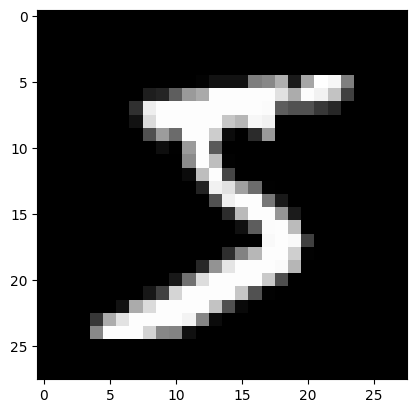

In [3]:
plt.imshow(x_train[0], cmap = 'gray')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Normalizing the dataset

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
x_train.shape

(60000, 28, 28)

Defining input and output for encoder with li regularization

In [8]:
encoder_input = keras.Input(shape = (28,28,1),name = 'Image')
x = keras.layers.Flatten()(encoder_input)
encoder_out = keras.layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(10e-5))(x)

In [9]:
encoder = keras.Model(encoder_input, encoder_out, name="encoder")

In [10]:
# encoder.compile(keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics = ['accuracy'] )

In [11]:
# encoder.fit(x_train, x_train, epochs = 50, batch_size = 32, validation_split = 0.1,shuffle = True)

In [12]:
# plt.imshow(encoder.predict([x_test[0].reshape(-1,28,28,1)])[0])

In [13]:
decoder_input = keras.layers.Dense(784, activation="relu")(encoder_out)

In [14]:
decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)

In [15]:
autoencoder =keras.Model(encoder_input, decoder_output, name = "autoencoder")

In [16]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Image (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [17]:
autoencoder.compile(keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics = ['accuracy'] )

In [28]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 32, validation_split = 0.1,shuffle = True)

Epoch 1/50
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0196 - accuracy: 0.8134 - val_loss: 0.0134 - val_accuracy: 0.8150
Epoch 2/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0124 - accuracy: 0.8149 - val_loss: 0.0118 - val_accuracy: 0.8152
Epoch 3/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0114 - accuracy: 0.8150 - val_loss: 0.0110 - val_accuracy: 0.8152
Epoch 4/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0109 - accuracy: 0.8150 - val_loss: 0.0108 - val_accuracy: 0.8152
Epoch 5/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0106 - accuracy: 0.8150 - val_loss: 0.0105 - val_accuracy: 0.8152
Epoch 6/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0105 - accuracy: 0.8150 - val_loss: 0.0104 - val_accuracy: 0.8152
Epoch 7/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0103 - accuracy: 0.8150 - val_loss: 0.0105 - val_accuracy:

In [29]:
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


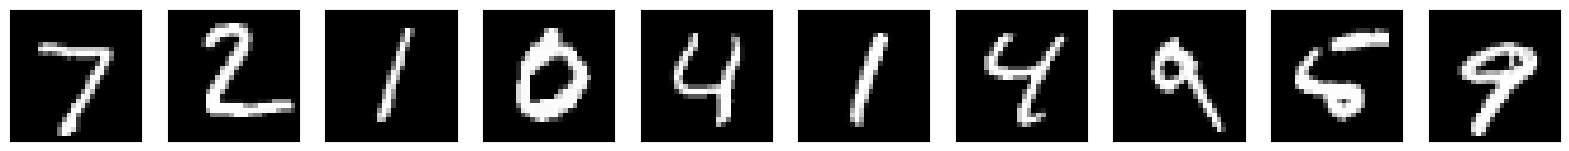

In [31]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

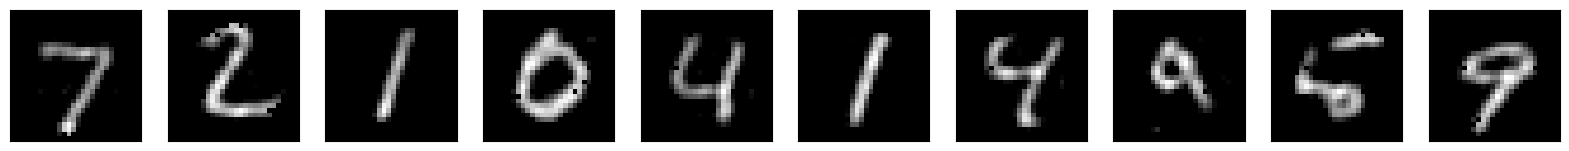

In [33]:
plt.figure(figsize=(20, 4))
for i in range(n):
      # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Autoencoder with l1 regularization

In [19]:
encoder_with_l1_input = keras.Input(shape = (28,28,1),name = 'Image')
##
x = keras.layers.Flatten()(encoder_with_l1_input)
##
encoder_with_l1_out = keras.layers.Dense(64, activation = 'relu', activity_regularizer=regularizers.l1(10e-5))(x)
##
encoder_with_l1 = keras.Model(encoder_with_l1_input, encoder_with_l1_out , name="encoder")
##
decoder_l1_input = keras.layers.Dense(784, activation="relu")(encoder_with_l1_out )
##
decoder_l1_output = keras.layers.Reshape((28,28,1))(decoder_l1_input)
##
autoencoder_with_l1 =keras.Model(encoder_with_l1_input, decoder_l1_output, name = "autoencoder")
##
autoencoder_with_l1.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Image (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [29]:
autoencoder_with_l1.compile(keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics = ['accuracy'] )

In [30]:
autoencoder_with_l1.fit(x_train, x_train, epochs = 50, batch_size = 32, validation_split = 0.1,shuffle = True)

Epoch 1/50
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0196 - accuracy: 0.8134 - val_loss: 0.0134 - val_accuracy: 0.8151
Epoch 2/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0125 - accuracy: 0.8150 - val_loss: 0.0119 - val_accuracy: 0.8152
Epoch 3/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0115 - accuracy: 0.8151 - val_loss: 0.0113 - val_accuracy: 0.8152
Epoch 4/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0110 - accuracy: 0.8151 - val_loss: 0.0108 - val_accuracy: 0.8153
Epoch 5/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0107 - accuracy: 0.8151 - val_loss: 0.0106 - val_accuracy: 0.8153
Epoch 6/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0105 - accuracy: 0.8151 - val_loss: 0.0105 - val_accuracy: 0.8153
Epoch 7/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0103 - accuracy: 0.8151 - val_loss: 0.0103 - val_accuracy:

In [90]:
encoded_imgs_l1 = autoencoder_with_l1.predict(x_test)
decoded_imgs_l1 = autoencoder_with_l1.predict(encoded_imgs_l1)

313/313 [==============================] - 1s 2ms/step


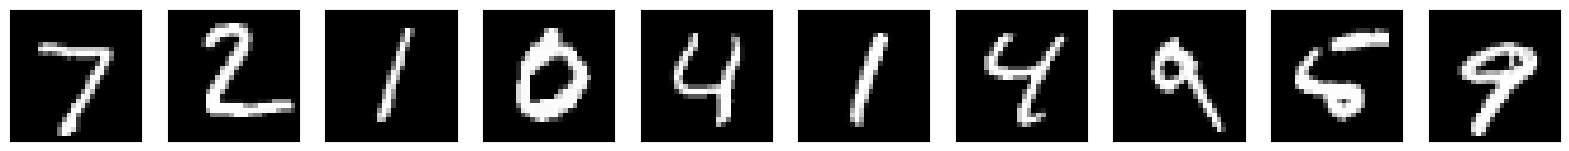

In [91]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

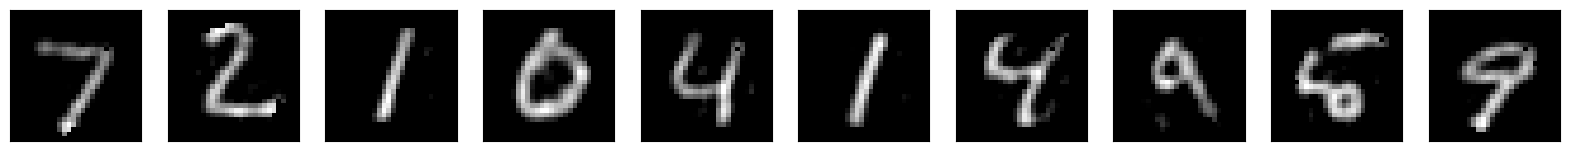

In [92]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs_l1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Autoencoder with l1 and l2 Regularization

In [34]:
encoder_with_l1_l2_input = keras.Input(shape = (28,28,1),name = 'Image')
##
x = keras.layers.Flatten()(encoder_with_l1_l2_input)
##
encoder_with_l1_l2_out = keras.layers.Dense(64, activation = 'relu', activity_regularizer=regularizers.l1_l2(10e-5))(x)
##
encoder_with_l1 = keras.Model(encoder_with_l1_l2_input, encoder_with_l1_l2_out , name="encoder")
##
decoder_l1_l2_input = keras.layers.Dense(784, activation="relu", activity_regularizer=regularizers.l1_l2(10e-5))(encoder_with_l1_l2_out )
##
decoder_l1_output = keras.layers.Reshape((28,28,1))(decoder_l1_l2_input)
##
autoencoder_with_l1_l2 =keras.Model(encoder_with_l1_l2_input, decoder_l1_output, name = "autoencoder")
##
autoencoder_with_l1_l2.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Image (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 784)               50960     
                                                                 
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [35]:
autoencoder_with_l1_l2.compile(keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics = ['accuracy'] )

In [36]:
autoencoder_with_l1_l2.fit(x_train, x_train, epochs = 50, batch_size = 32, validation_split = 0.1,shuffle = True)

Epoch 1/50
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1084 - accuracy: 0.8088 - val_loss: 0.1073 - val_accuracy: 0.8088
Epoch 2/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1075 - accuracy: 0.8088 - val_loss: 0.1066 - val_accuracy: 0.8088
Epoch 3/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1070 - accuracy: 0.8088 - val_loss: 0.1063 - val_accuracy: 0.8088
Epoch 4/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1067 - accuracy: 0.8088 - val_loss: 0.1060 - val_accuracy: 0.8088
Epoch 5/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1065 - accuracy: 0.8088 - val_loss: 0.1059 - val_accuracy: 0.8088
Epoch 6/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1063 - accuracy: 0.8088 - val_loss: 0.1057 - val_accuracy: 0.8088
Epoch 7/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1062 - accuracy: 0.8088 - val_loss: 0.1055 - val_accuracy:

In [93]:
encoded_imgs_l1_l2 = autoencoder_with_l1_l2.predict(x_test)
decoded_imgs_l1_l2 = autoencoder_with_l1_l2.predict(encoded_imgs_l1_l2)

313/313 [==============================] - 1s 1ms/step


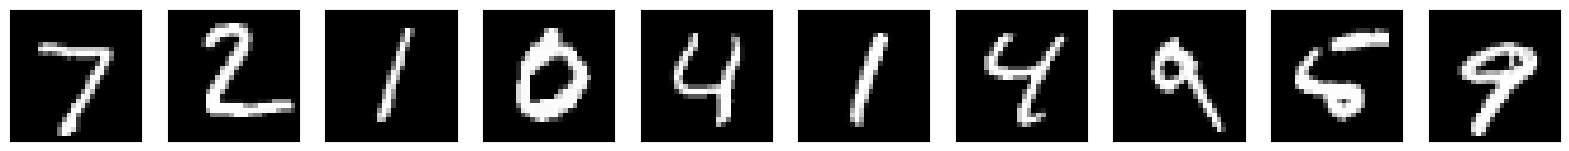

In [94]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

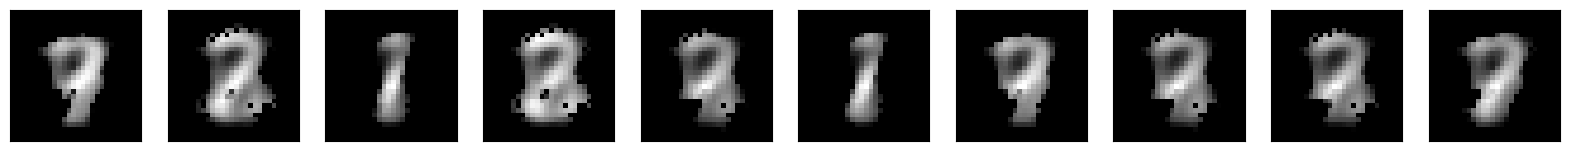

In [95]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs_l1_l2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Autoencoder with l1 in encoding layer and l2 in decoding layer

In [75]:
encoder_with_el1_dl2_input = keras.Input(shape = (28,28,1),name = 'Image')
##
x = keras.layers.Flatten()(encoder_with_el1_dl2_input)
##
encoder_with_el1_dl2_out = keras.layers.Dense(64, activation = 'relu', activity_regularizer=regularizers.l1(10e-5))(x)
##
encoder_with_el1_dl2 = keras.Model(encoder_with_el1_dl2_input, encoder_with_el1_dl2_out , name="encoder")
##
decoder_el1_dl2_input = keras.layers.Dense(784, activation="relu", activity_regularizer=regularizers.l2(10e-5))(encoder_with_el1_dl2_out )
##
decoder_el1_dl2_output = keras.layers.Reshape((28,28,1))(decoder_el1_dl2_input)
##
autoencoder_with_el1_dl2 =keras.Model(encoder_with_el1_dl2_input, decoder_el1_dl2_output, name = "autoencoder")
##
autoencoder_with_el1_dl2.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Image (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                50240     
                                                                 
 dense_26 (Dense)            (None, 784)               50960     
                                                                 
 reshape_11 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [76]:
autoencoder_with_el1_dl2.compile(keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics = ['accuracy'] )

In [77]:
autoencoder_with_el1_dl2.fit(x_train, x_train, epochs = 50, batch_size = 32, validation_split = 0.1,shuffle = True)

Epoch 1/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0274 - accuracy: 0.8137 - val_loss: 0.0215 - val_accuracy: 0.8150
Epoch 2/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0209 - accuracy: 0.8149 - val_loss: 0.0203 - val_accuracy: 0.8151
Epoch 3/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0199 - accuracy: 0.8150 - val_loss: 0.0196 - val_accuracy: 0.8152
Epoch 4/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0194 - accuracy: 0.8150 - val_loss: 0.0191 - val_accuracy: 0.8152
Epoch 5/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.8150 - val_loss: 0.0189 - val_accuracy: 0.8152
Epoch 6/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0188 - accuracy: 0.8150 - val_loss: 0.0186 - val_accuracy: 0.8152
Epoch 7/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0187 - accuracy: 0.8150 - val_loss: 0.0185 - val_accuracy:

In [96]:
encoded_imgs_el1_dl2 = autoencoder_with_el1_dl2.predict(x_test)
decoded_imgs_el1_dl2 = autoencoder_with_el1_dl2.predict(encoded_imgs_el1_dl2)

313/313 [==============================] - 0s 2ms/step


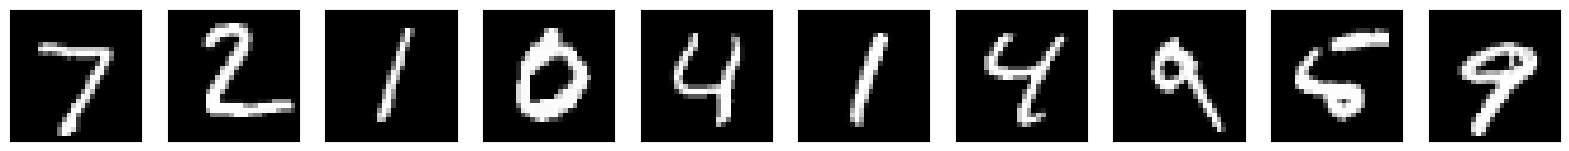

In [97]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

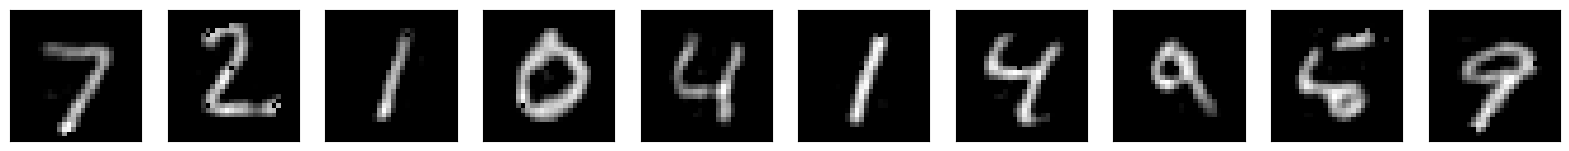

In [98]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs_el1_dl2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Autoencoder with l1 in decoding part

In [101]:
encoder_with_dl2_input = keras.Input(shape = (28,28,1),name = 'Image')
##
x = keras.layers.Flatten()(encoder_with_dl2_input)
##
encoder_with_dl2_out = keras.layers.Dense(64, activation = 'relu')(x)
##
encoder_with_dl2 = keras.Model(encoder_with_dl2_input, encoder_with_dl2_out , name="encoder")
##
decoder_dl2_input = keras.layers.Dense(784, activation="relu", activity_regularizer=regularizers.l2(10e-5))(encoder_with_dl2_out )
##
decoder_dl2_output = keras.layers.Reshape((28,28,1))(decoder_dl2_input)
##
autoencoder_with_dl2 =keras.Model(encoder_with_dl2_input, decoder_dl2_output, name = "autoencoder")
##
autoencoder_with_dl2.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Image (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                50240     
                                                                 
 dense_32 (Dense)            (None, 784)               50960     
                                                                 
 reshape_14 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [102]:
autoencoder_with_dl2.compile(keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics = ['accuracy'] )

In [103]:
autoencoder_with_dl2.fit(x_train, x_train, epochs = 50, batch_size = 32, validation_split = 0.1,shuffle = True)

Epoch 1/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0241 - accuracy: 0.8137 - val_loss: 0.0187 - val_accuracy: 0.8151
Epoch 2/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0182 - accuracy: 0.8149 - val_loss: 0.0178 - val_accuracy: 0.8151
Epoch 3/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0177 - accuracy: 0.8150 - val_loss: 0.0175 - val_accuracy: 0.8152
Epoch 4/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0175 - accuracy: 0.8150 - val_loss: 0.0174 - val_accuracy: 0.8152
Epoch 5/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0175 - accuracy: 0.8150 - val_loss: 0.0174 - val_accuracy: 0.8152
Epoch 6/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0174 - accuracy: 0.8150 - val_loss: 0.0173 - val_accuracy: 0.8152
Epoch 7/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0174 - accuracy: 0.8150 - val_loss: 0.0174 - val_accuracy:

In [104]:
encoded_imgs_dl2 = autoencoder_with_dl2.predict(x_test)
decoded_imgs_dl2 = autoencoder_with_dl2.predict(encoded_imgs_dl2)

313/313 [==============================] - 1s 1ms/step


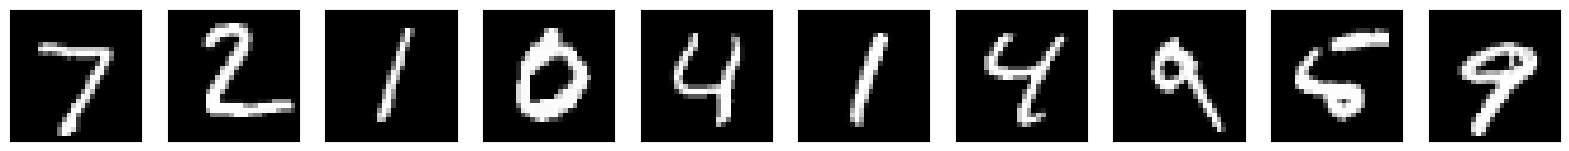

In [105]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

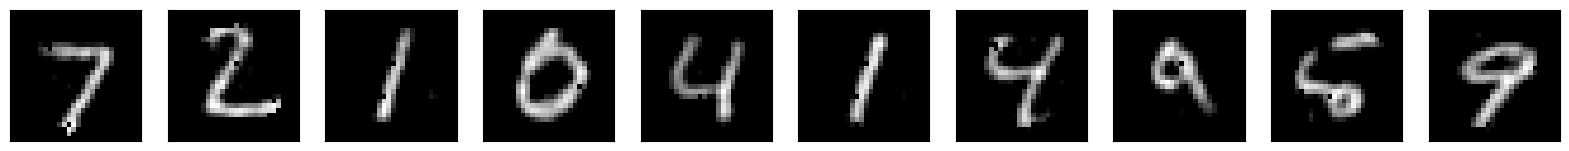

In [106]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs_dl2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()